In [1]:
from lumbar_coordinate.dataloader.dataset import getData

ds = getData("/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data")

/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0001.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0002.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0003.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0004.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0005.jpg


In [2]:
img, coords = ds[0]

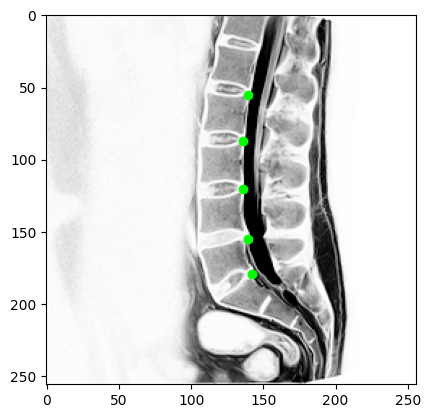

In [4]:
ds.visualize(15)

In [15]:
import matplotlib.pyplot as plt

def visualize(img, coords):
    plt.imshow(img.permute(1,2,0), cmap="Grays")
    plt.scatter(coords[:, 0], coords[:,1], color = "lime")
    plt.show()

In [10]:
import torch

x1 = torch.rand(3,5,2)
x2 = torch.rand(3,5,2)
y = x1 - x2
y = y**2
y.sum(dim = 2).sum(dim=1)

tensor([1.5013, 1.3791, 1.7177])

In [14]:
a = torch.rand(10, 5)
b = torch.rand(10, 5)
lossfn = torch.nn.MSELoss()
lossfn(a,b)

tensor(0.1899)

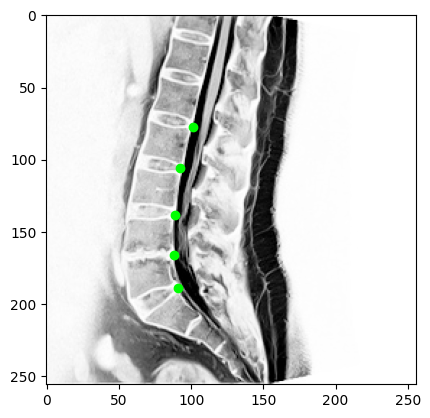

In [16]:
visualize(img, coords)

In [24]:
from torch.utils.data import Dataset
import torchvision.transforms as tt
from pathlib import Path
import pandas as pd
import torch
from PIL import Image

preprocess = [
    tt.Grayscale(),
    tt.CenterCrop(256),
    tt.ToTensor(),
]

class getDataset(Dataset):
    def __init__(self, base_path: str|Path):
        super().__init__()
        if isinstance(base_path, str):
            base_path = Path(base_path)
        base_path = base_path.resolve()

        df = pd.read_csv(base_path/"coords_pretrain.csv")

        df["img_paths"] = [(base_path/"data"/f"processed_{row['source']}_jpgs"/row['filename']) for _, row in df.iterrows()]
        df = df.groupby("img_paths").agg(lambda x: list(x))
        self._filenames = list(df.index.values)
        self._xs = list(df.x.values)
        self._ys = list(df.y.values)
        for i in range(5):
            print(self._filenames[i])

    @property
    def xs(self):
        return self._xs
    
    def __getitem__(self, index) -> tuple[torch.Tensor, torch.Tensor]:
        img = preprocess(Image.open(self._filenames[index]))
        xs = self._xs[index]
        ys = self._ys[index]
        target = torch.Tensor([xs, ys]).T
        return img, target
    
    def __len__(self):
        return len(self._filenames)



In [25]:
from pathlib import Path

base_path = Path("/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data")
df = pd.read_csv(base_path/"coords_pretrain.csv")

In [26]:
ds = getDataset(base_path)


/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0001.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0002.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0003.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0004.jpg
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0005.jpg


In [3]:
ds._filenames

[PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0001.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0002.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0003.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0004.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0005.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0006.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0007.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0008.jpg'),
 PosixPath('/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordina

In [12]:
df = df.groupby("img_paths").agg(lambda x: list(x))
df

,filename,source,x,y,level,relative_x,relative_y
img_paths,,,,,,,
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0001.jpg,"[0001.jpg, 0001.jpg, 0001.jpg, 0001.jpg, 0001....","[lsd, lsd, lsd, lsd, lsd]","[91, 88, 89, 92, 101]","[189, 166, 138, 106, 77]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.35546875, 0.34375, 0.34765625, 0.359375, 0....","[0.73828125, 0.6484375, 0.5390625, 0.4140625, ..."
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0002.jpg,"[0002.jpg, 0002.jpg, 0002.jpg, 0002.jpg, 0002....","[lsd, lsd, lsd, lsd, lsd]","[104, 99, 100, 105, 113]","[198, 167, 132, 100, 68]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.40625, 0.38671875, 0.390625, 0.41015625, 0....","[0.7734375, 0.65234375, 0.515625, 0.390625, 0...."
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0003.jpg,"[0003.jpg, 0003.jpg, 0003.jpg, 0003.jpg, 0003....","[lsd, lsd, lsd, lsd, lsd]","[152, 153, 158, 164, 169]","[188, 157, 123, 89, 57]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.59375, 0.59765625, 0.6171875, 0.640625, 0.6...","[0.734375, 0.61328125, 0.48046875, 0.34765625,..."
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0004.jpg,"[0004.jpg, 0004.jpg, 0004.jpg, 0004.jpg, 0004....","[lsd, lsd, lsd, lsd, lsd]","[147, 138, 133, 136, 143]","[183, 158, 125, 95, 63]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.57421875, 0.5390625, 0.51953125, 0.53125, 0...","[0.71484375, 0.6171875, 0.48828125, 0.37109375..."
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_lsd_jpgs/0005.jpg,"[0005.jpg, 0005.jpg, 0005.jpg, 0005.jpg, 0005....","[lsd, lsd, lsd, lsd, lsd]","[131, 128, 128, 134, 139]","[190, 168, 134, 101, 71]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.51171875, 0.5, 0.5, 0.5234375, 0.54296875]","[0.7421875, 0.65625, 0.5234375, 0.39453125, 0...."
...,...,...,...,...,...,...,...
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_tseg_jpgs/case_1201.jpg,"[case_1201.jpg, case_1201.jpg, case_1201.jpg, ...","[tseg, tseg, tseg, tseg, tseg]","[132, 125, 123, 126, 131]","[195, 169, 141, 110, 82]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.515625, 0.48828125, 0.48046875, 0.4921875, ...","[0.76171875, 0.66015625, 0.55078125, 0.4296875..."
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_tseg_jpgs/case_1217.jpg,"[case_1217.jpg, case_1217.jpg, case_1217.jpg, ...","[tseg, tseg, tseg, tseg, tseg]","[119, 115, 118, 123, 126]","[196, 169, 142, 111, 81]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.46484375, 0.44921875, 0.4609375, 0.48046875...","[0.765625, 0.66015625, 0.5546875, 0.43359375, ..."
/home/ad.adasworks.com/attila.magyar/Desktop/lumbar_coordinate/data/data/processed_tseg_jpgs/case_1221.jpg,"[case_1221.jpg, case_1221.jpg, case_1221.jpg, ...","[tseg, tseg, tseg, tseg, tseg]","[122, 112, 114, 123, 133]","[193, 168, 139, 110, 80]","[L5/S1, L4/L5, L3/L4, L2/L3, L1/L2]","[0.4765625, 0.4375, 0.4453125, 0.48046875, 0.5...","[0.75390625, 0.65625, 0.54296875, 0.4296875, 0..."


In [17]:
df.x.values[1]

[104, 99, 100, 105, 113]